
# IEEE VIS Papers 1990–2024 — Comprehensive Exploratory Data Analysis


## Dataset

Il dataset è memorizzato come Google Spreadsheet. I dati contengono le seguenti colonne:

- **Conference:** Short title of the conference the paper appeared in. One of `{SciVis, InfoVis, VAST, Vis}`. See notes on conference names below.
- **Year:** The year the paper appeared at the conference (note that this can be different from the year the paper has been published; e.g., most VIS 2018 papers were published in the first 2019 issue of the *TVCG* journal).
- **Title:** The title of the paper.
- **DOI:** If we found it, a DOI for the paper. When a paper did not include a valid DOI, a syntactically valid but fake DOI was entered that starts with `10.0000`. This column can thus be used as a unique identifier for each paper.
- **Link:** A link to the paper in the IEEE Digital Library — based on the DOI.
- **FirstPage:** The first page of the paper in the printed proceedings. This information has not been thoroughly checked for correctness.
- **GLastPage:** The last page of the paper in the printed proceedings. This information has not been thoroughly checked for correctness. Note that sometimes a second page is listed here (e.g., `20,203`). This is often the case for older years that included a separate color page for pictures in the back of the proceedings. The page after the comma is the page where the colored pictures appeared.
- **PaperType:** `PaperType`: one of `C` (conference paper), `J` (journal paper), `M` (miscellaneous). If you would like to filter for scientific research articles, then take all `C`s and `J`s. Papers with an `M` are not typically considered archival publications.
- **Abstract:** The abstract of the paper.
- **AuthorNames-Deduped :** `AuthorNames-Deduped`. Co-authors are separated by a semicolon. Authors are ordered by how they appear on the paper. The full author names were taken from the de-duplicated names DBLP provides.
- **AuthorNames:** Author names as they appeared on the paper. Currently this column is not yet complete. For analysis you should always use column **J**.
- **AuthorAffiliation :** `AuthorAffiliation`. This information has not been cleaned up and, for most entries, shows only the affiliation of the first author. This information has only partially been checked for correctness. We have, however, checked that there is now one affiliation per author separated by a semicolon. The affiliation may be empty. If an author has more than one affiliation, these affiliations are separated by a `#` character.
- **InternalReferences:** A list of `InternalReferences` to other IEEE VIS papers using DOIs of the papers in this list. This list does not include citations to papers external to this conference series. These internal citations are automatically extracted either from a full-text extraction of the citation data using Grobid (for older papers) or using CrossRef or Aminer (for papers from VIS 2021 onwards).
- **AuthorKeywords:** A list of `AuthorKeywords` freely chosen by the authors — extracted as found in the paper PDF.
- **AminerCitationCount:** A number indicating how many times this publication has been cited. The `AminerCitationCount` was extracted from the Aminer dataset (using a DBLP citation network). A missing value indicates that this publication was not found in the Aminer dataset.
- **CitationCount_CrossRef:** A number indicating how many times this publication has been cited. The `CitationCount_CrossRef` was extracted from CrossRef. A missing value indicates that the article was not found on CrossRef.
- **CitationCount_CrossRef:** `PubsCited_CrossRef`: a number indicating a reference count, i.e., the number of other papers this publication cites. This is also automatically extracted via the CrossRef API.
- **Downloads_Xplore:** `Downloads_Xplore`: a number that indicates how often the article has been downloaded from IEEE Xplore.
- **Award:** A code indicating any VIS internal award the publication has won. The data for `BP` and `HM` are reliable from about 2004 for InfoVis and 2009 for Vis. Historic records on awards in early years are very sparse (e.g., from people's personal websites or CVs). `TT` awards are a recent addition to the conference and are therefore complete.

  - `BP` = best paper  
  - `HM` = best paper honorable mention (runner-up)  
  - `TT` = test of time award (influential over time)  
  - `BA` = best application paper award (early years)  
  - `BCS` = best case study award (early years)

- **GraphicsReplicabilityStamp:** `GraphicsReplicabilityStamp`: this column contains an `X` if the paper has been awarded a graphics replicability stamp.


## 1. Load the dataset


In [2]:

# Load the dataset (already available in the environment)
file_path = "dataset.csv"
df = pd.read_csv(file_path)


df.shape, df.head()


((3877, 20),
   Conference  Year                                              Title                        DOI  \
 0    InfoVis  2011                           D³ Data-Driven Documents      10.1109/tvcg.2011.185   
 1    InfoVis  2014          UpSet: Visualization of Intersecting Sets  10.1109/tvcg.2014.2346248   
 2    InfoVis  2010  Narrative Visualization: Telling Stories with ...      10.1109/tvcg.2010.179   
 3    InfoVis  2006  Hierarchical Edge Bundles: Visualization of Ad...      10.1109/tvcg.2006.147   
 4    InfoVis  2007  Toward a Deeper Understanding of the Role of I...    10.1109/tvcg.2007.70515   
 
                                           Link  FirstPage  LastPage PaperType  \
 0      http://dx.doi.org/10.1109/TVCG.2011.185     2301.0    2309.0         J   
 1  http://dx.doi.org/10.1109/TVCG.2014.2346248     1983.0    1992.0         J   
 2      http://dx.doi.org/10.1109/TVCG.2010.179     1139.0    1148.0         J   
 3      http://dx.doi.org/10.1109/TVCG.2006.147    

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Conference                  3877 non-null   object 
 1   Year                        3877 non-null   int64  
 2   Title                       3877 non-null   object 
 3   DOI                         3877 non-null   object 
 4   Link                        3877 non-null   object 
 5   FirstPage                   3826 non-null   float64
 6   LastPage                    3611 non-null   float64
 7   PaperType                   3877 non-null   object 
 8   Abstract                    3807 non-null   object 
 9   AuthorNames-Deduped         3875 non-null   object 
 10  AuthorNames                 3876 non-null   object 
 11  AuthorAffiliation           3871 non-null   object 
 12  InternalReferences          3248 non-null   object 
 13  AuthorKeywords              2898 

In [4]:
numeric_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='object').columns

print("Numeric Columns:", list(numeric_cols))
print("Categorical Columns:", list(categorical_cols))

Numeric Columns: ['Year', 'FirstPage', 'LastPage', 'AminerCitationCount', 'CitationCount_CrossRef', 'PubsCited_CrossRef', 'Downloads_Xplore']
Categorical Columns: ['Conference', 'Title', 'DOI', 'Link', 'PaperType', 'Abstract', 'AuthorNames-Deduped', 'AuthorNames', 'AuthorAffiliation', 'InternalReferences', 'AuthorKeywords', 'Award', 'GraphicsReplicabilityStamp']


In [5]:
df_fixed = df.copy()

for col in df_fixed.columns:
    if df_fixed[col].apply(lambda x: isinstance(x, list)).any():
        df_fixed[col] = df_fixed[col].astype(str)

unique_counts = df_fixed.nunique()
print(unique_counts)

Conference                       4
Year                            35
Title                         3875
DOI                           3877
Link                          3875
FirstPage                     1588
LastPage                      1614
PaperType                        3
Abstract                      3806
AuthorNames-Deduped           3719
AuthorNames                   3739
AuthorAffiliation             3634
InternalReferences            3180
AuthorKeywords                2882
AminerCitationCount            396
CitationCount_CrossRef         228
PubsCited_CrossRef             119
Downloads_Xplore              1678
Award                            6
GraphicsReplicabilityStamp       1
dtype: int64


In [21]:
cols_to_keep = [
    'Conference', 
    'Year', 
    'Title', 
    'DOI', 
    'AuthorNames-Deduped', 
    'AuthorAffiliation',   
    'AminerCitationCount', 
    "AuthorKeywords",
    'Award',
    "PaperType"
]

existing_cols = [c for c in cols_to_keep if c in df.columns]
df_clean = df[existing_cols].copy()


df_clean.rename(columns={
    'AuthorNames-Deduped': 'Authors',
    'AuthorAffiliation': 'Affiliation',
    'AminerCitationCount': 'Citations'
}, inplace=True)

  Conference  Count  Percentage
0        Vis   1942       50.09
1    InfoVis    886       22.85
2       VAST    744       19.19
3     SciVis    305        7.87


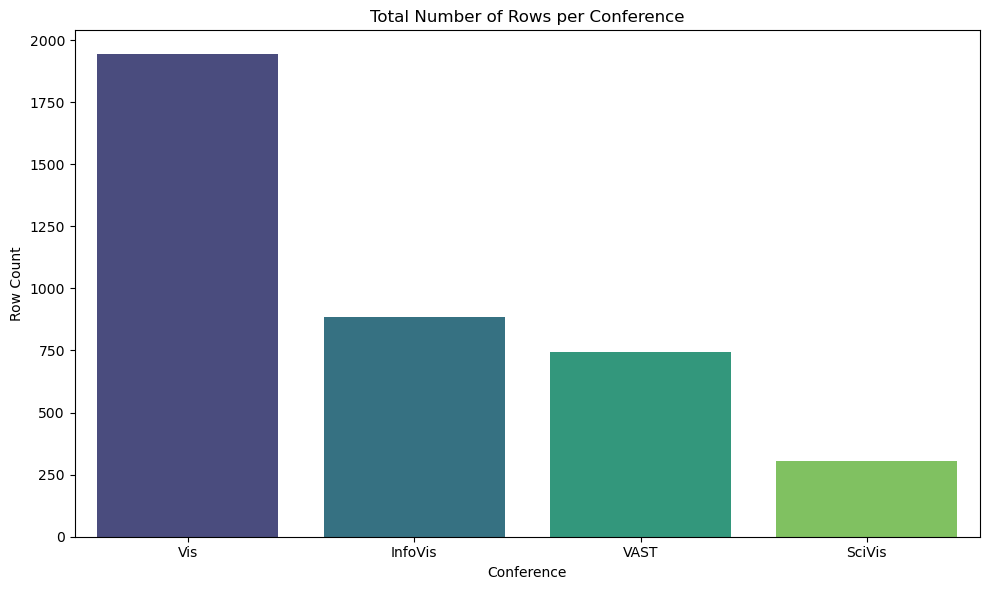

In [7]:
# Calculate conference counts and percentages
papers_per_conf_counts = (
    df_clean["Conference"]
    .value_counts()
    .rename_axis("Conference")
    .reset_index(name="Count")
)

# Add percentage column
papers_per_conf_counts["Percentage"] = (papers_per_conf_counts["Count"] / papers_per_conf_counts["Count"].sum() * 100).round(2)

print(papers_per_conf_counts)

# ---- Plot ---- #

plt.figure(figsize=(10, 6))
sns.barplot(
    data=papers_per_conf_counts,
    x="Conference",
    hue="Conference",
    y="Count",
    palette="viridis",
    order=papers_per_conf_counts.sort_values("Count", ascending=False)["Conference"]
)

plt.title("Total Number of Rows per Conference")
plt.ylabel("Row Count")
plt.xlabel("Conference")
plt.tight_layout()
plt.show()

### 📝 Design Note: "The Great Unification"

Context: Until 2020, the papers were divided into separate silos (InfoVis, VAST, and SciVis). Starting in 2021, the conference became a single unified entity ("IEEE VIS").

On the Website: We must not hide this transition; on the contrary, we must highlight it as a major historical plot twist.

https://ieeevis.org/year/2024/blog/things-are-changing-2021


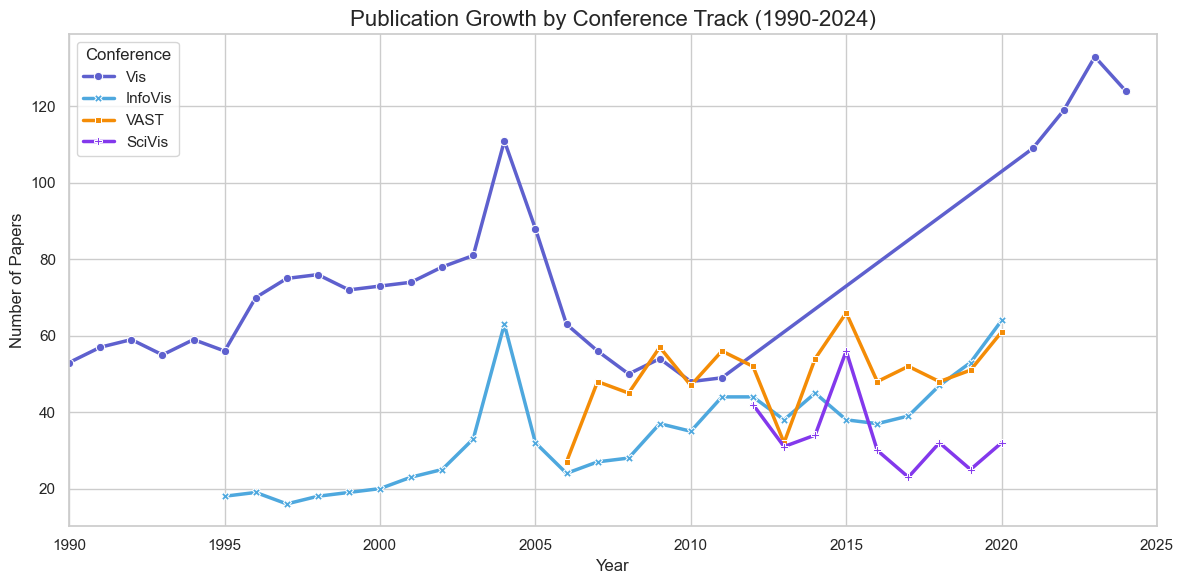

In [8]:
target_confs = ['Vis', 'InfoVis', 'VAST', 'SciVis']
palette={'Vis': '#5E60CE', 'InfoVis': '#4EA8DE', 'VAST': '#F48C06', 'SciVis': '#8338EC'}
df_filtered = df_clean[df_clean['Conference'].isin(target_confs)]


df_yearly = df_filtered.groupby(['Year', 'Conference']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

sns.lineplot(
    data=df_yearly, 
    x='Year', 
    y='Count', 
    hue='Conference', 
    style='Conference', 
    markers=True, 
    dashes=False,
    palette=palette,
    linewidth=2.5
)

plt.title('Publication Growth by Conference Track (1990-2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Papers', fontsize=12)
plt.legend(title='Conference')
plt.xlim(1990, 2025)

# Show Plot
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

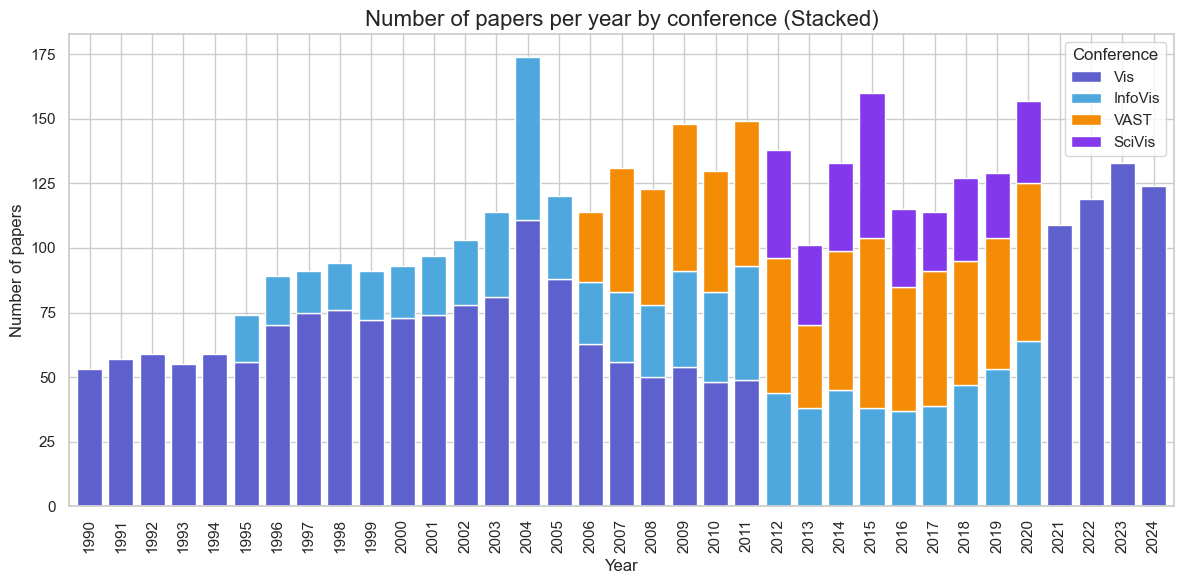

In [9]:
target_confs = ['Vis', 'InfoVis', 'VAST', 'SciVis']
df_filtered = df_clean[df_clean['Conference'].isin(target_confs)]

papers_per_year_conf = df_filtered.groupby(['Year', 'Conference']).size().unstack(fill_value=0)

existing_confs = [c for c in target_confs if c in papers_per_year_conf.columns]
papers_per_year_conf = papers_per_year_conf[existing_confs]

#colors_map = {'Vis': '#5E60CE', 'InfoVis': '#4EA8DE', 'VAST': '#F48C06', 'SciVis': '#8338EC'}
plot_colors = [palette[c] for c in papers_per_year_conf.columns]


plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

ax = papers_per_year_conf.plot(
    kind="bar", 
    stacked=True, 
    color=plot_colors, 
    figsize=(12, 6),
    width=0.8
)

plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of papers", fontsize=12)
plt.title("Number of papers per year by conference (Stacked)", fontsize=16)
plt.legend(title='Conference')
plt.tight_layout()

plt.show()

    Year  Count  Percentage
34  1990     53        1.37
32  1991     57        1.47
30  1992     59        1.52
33  1993     55        1.42
31  1994     59        1.52
29  1995     74        1.91
28  1996     89        2.30
26  1997     91        2.35
24  1998     94        2.42
27  1999     91        2.35
25  2000     93        2.40
23  2001     97        2.50
21  2002    103        2.66
17  2003    114        2.94
0   2004    174        4.49
14  2005    120        3.10
19  2006    114        2.94
8   2007    131        3.38
13  2008    123        3.17
4   2009    148        3.82
9   2010    130        3.35
3   2011    149        3.84
5   2012    138        3.56
22  2013    101        2.61
7   2014    133        3.43
1   2015    160        4.13
16  2016    115        2.97
18  2017    114        2.94
11  2018    127        3.28
10  2019    129        3.33
2   2020    157        4.05
20  2021    109        2.81
15  2022    119        3.07
6   2023    133        3.43
12  2024    124     

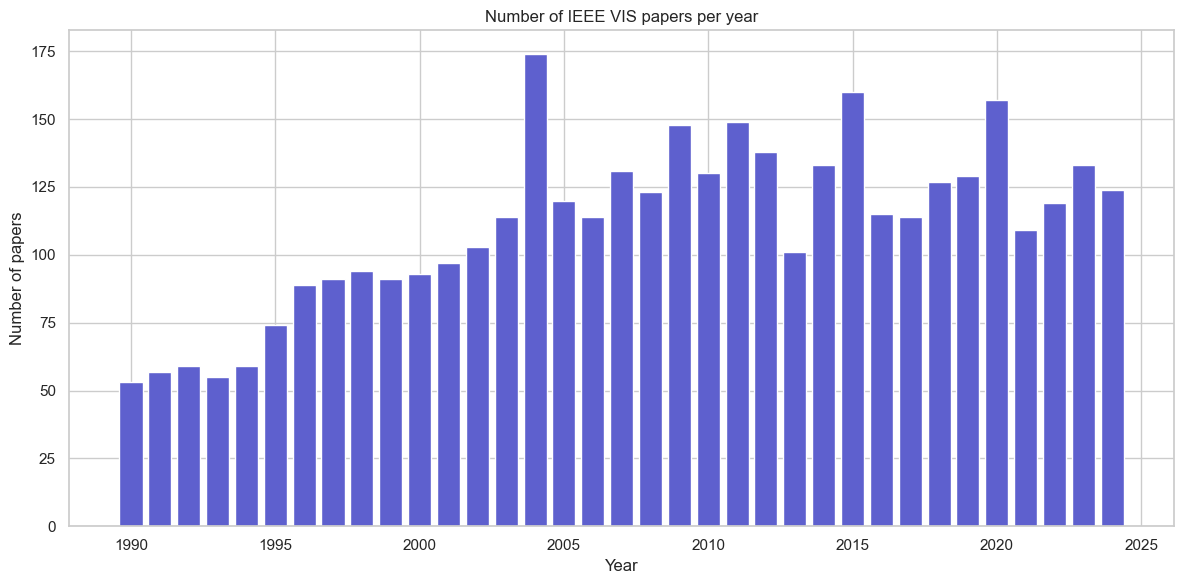

In [10]:
papers_per_year_counts = (
    df_clean["Year"]
    .value_counts()
    .rename_axis("Year")
    .reset_index(name="Count")
)

papers_per_year_counts = papers_per_year_counts.sort_values("Year")

papers_per_year_counts["Percentage"] = (
    papers_per_year_counts["Count"] / papers_per_year_counts["Count"].sum() * 100
).round(2)

print(papers_per_year_counts)


plt.figure(figsize=(12, 6)) 
plt.bar(papers_per_year_counts["Year"], papers_per_year_counts["Count"], color="#5E60CE")
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.title("Number of IEEE VIS papers per year")
plt.tight_layout()
plt.show()

--- Summary Table ---
  Paper Type  Count  Percentage
0          J   1999       51.56
1          C   1559       40.21
2          M    319        8.23
------------------------------


<Figure size 1200x600 with 0 Axes>

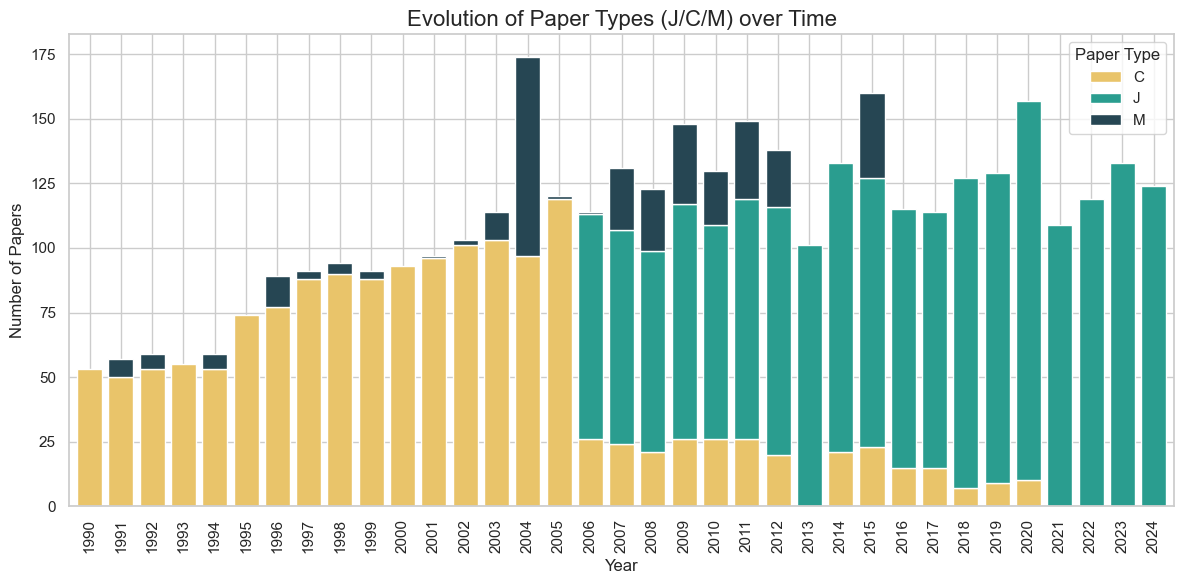

In [11]:
papers_per_type_counts = (
    df_clean["PaperType"]
    .value_counts()
    .rename_axis("Paper Type")
    .reset_index(name="Count")
)

papers_per_type_counts["Percentage"] = (
    papers_per_type_counts["Count"] / papers_per_type_counts["Count"].sum() * 100
).round(2)

print("--- Summary Table ---")
print(papers_per_type_counts)
print("-" * 30)

relevant_types = ['J', 'C', 'M']
df_types = df_clean[df_clean['PaperType'].isin(relevant_types)]


type_by_year = df_types.groupby(['Year', 'PaperType']).size().unstack(fill_value=0)


type_colors = {
    'J': '#2A9D8F',  # Verde Ottanio
    'C': '#E9C46A',  # Giallo
    'M': '#264653'   # Grigio scuro
}
plot_colors = [type_colors.get(c, '#999') for c in type_by_year.columns]


plt.figure(figsize=(12, 6))
ax = type_by_year.plot(
    kind='bar', 
    stacked=True, 
    color=plot_colors, 
    figsize=(12, 6),
    width=0.8
)

plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Papers", fontsize=12)
plt.title("Evolution of Paper Types (J/C/M) over Time", fontsize=16)
plt.legend(title='Paper Type')
plt.tight_layout()

plt.show()

In [12]:
df_clean = df_clean[df_clean['PaperType'].isin(['J', 'C'])]

In [13]:
df_clean['Year'] = df_clean['Year'].astype(int)
df_clean['Citations'] = df_clean['Citations'].fillna(0).astype(int)

### EXPLANATION: 
* 'J' = Journal (Top tier research, TVCG).
* 'C' = Conference (Standard proceedings).
* 'M' = Magazine (Panels, keynotes, less technical articles).

### WHAT TO REMOVE:
* We keep only 'J' and 'C' to focus on scientific research papers.
* We DROP 'M' because they are often just summaries or intros, not full research.

   Award  Count  Percentage
0     HM    144       52.75
1     BP     78       28.57
2     TT     35       12.82
3     BA      6        2.20
4  TT;BP      5        1.83
5    BCS      5        1.83


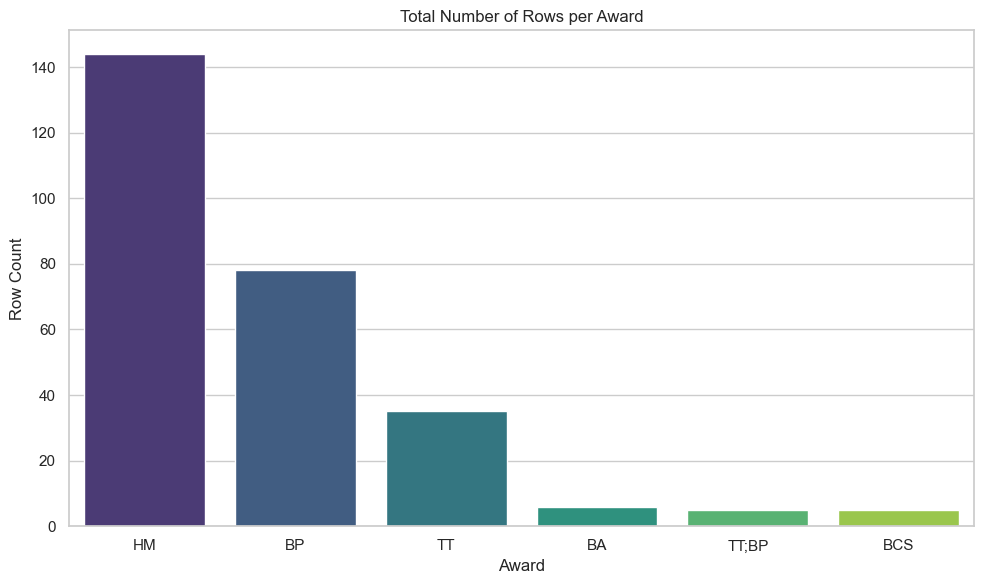

In [23]:
# Calculate conference counts and percentages
papers_per_conf_counts = (
    df_clean["Award"]
    .value_counts()
    .rename_axis("Award")
    .reset_index(name="Count")
)

# Add percentage column
papers_per_conf_counts["Percentage"] = (papers_per_conf_counts["Count"] / papers_per_conf_counts["Count"].sum() * 100).round(2)

print(papers_per_conf_counts)

# ---- Plot ---- #

plt.figure(figsize=(10, 6))
sns.barplot(
    data=papers_per_conf_counts,
    x="Award",
    hue="Award",
    y="Count",
    palette="viridis",
    order=papers_per_conf_counts.sort_values("Count", ascending=False)["Award"]
)

plt.title("Total Number of Rows per Award")
plt.ylabel("Row Count")
plt.xlabel("Award")
plt.tight_layout()
plt.show()

# the best way fo visualisation is HEATMAP

Average Authors (First 5 Years):
Year
1990    2.26
1991    2.56
1992    2.51
1993    2.35
1994    2.58
Name: NumAuthors, dtype: float64

Average Authors (Last 5 Years):
Year
2020    5.05
2021    5.05
2022    5.38
2023    5.33
2024    4.70
Name: NumAuthors, dtype: float64


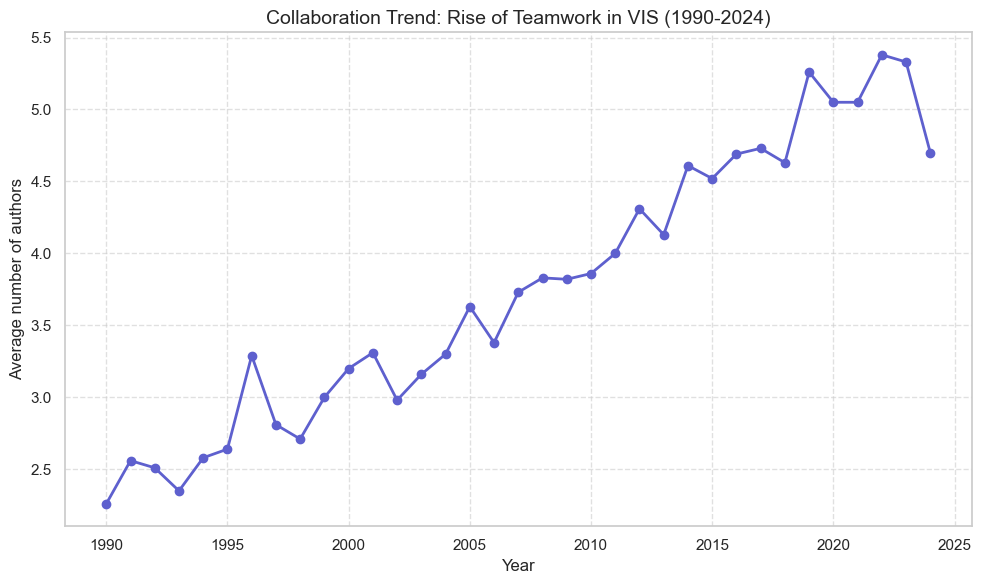

In [14]:
author_col = "Authors" if "Authors" in df_clean.columns else "AuthorNames-Deduped"

def count_authors(author_string):
    if pd.isna(author_string):
        return 0
    
    parts = [a.strip() for a in str(author_string).split(";")]
    parts = [p for p in parts if len(p) > 1] 
    return len(parts)


df_clean["NumAuthors"] = df_clean[author_col].apply(count_authors)


avg_authors_per_year = (df_clean.groupby("Year")["NumAuthors"].mean()).round(2)

print("Average Authors (First 5 Years):")
print(avg_authors_per_year.head())
print("\nAverage Authors (Last 5 Years):")
print(avg_authors_per_year.tail())


plt.figure(figsize=(10, 6))


avg_authors_per_year.plot(kind='line', marker='o', color='#5E60CE', linewidth=2)

plt.xlabel("Year", fontsize=12)
plt.ylabel("Average number of authors", fontsize=12)
plt.title("Collaboration Trend: Rise of Teamwork in VIS (1990-2024)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6) # Aggiunge una griglia leggera
plt.tight_layout()

plt.show()

Totale apparizioni autori: 14071
Autori unici totali: 6636

--- Top 10 Authors by Paper Count ---
<bound method NDFrame.head of                   Author  PaperCount
0            Kwan-Liu Ma          75
1              Huamin Qu          75
2      M. Eduard Gröller          66
3      Hanspeter Pfister          64
4        Arie E. Kaufman          56
...                  ...         ...
6631  Martin Graham 0001           1
6632    Joshua V. Dillon           1
6633              Yi Mao           1
6634   Lawrence H. Staib           1
6635         Marc Abrams           1

[6636 rows x 2 columns]>

--- Distribution Stats ---
count    6636.000000
mean        2.120404
std         3.829580
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        75.000000
Name: PaperCount, dtype: float64

--- Unique Authors per Year (Head) ---
Year
1990    119
1991    124
1992    125
1993    122
1994    129
Name: AuthorList, dtype: int64


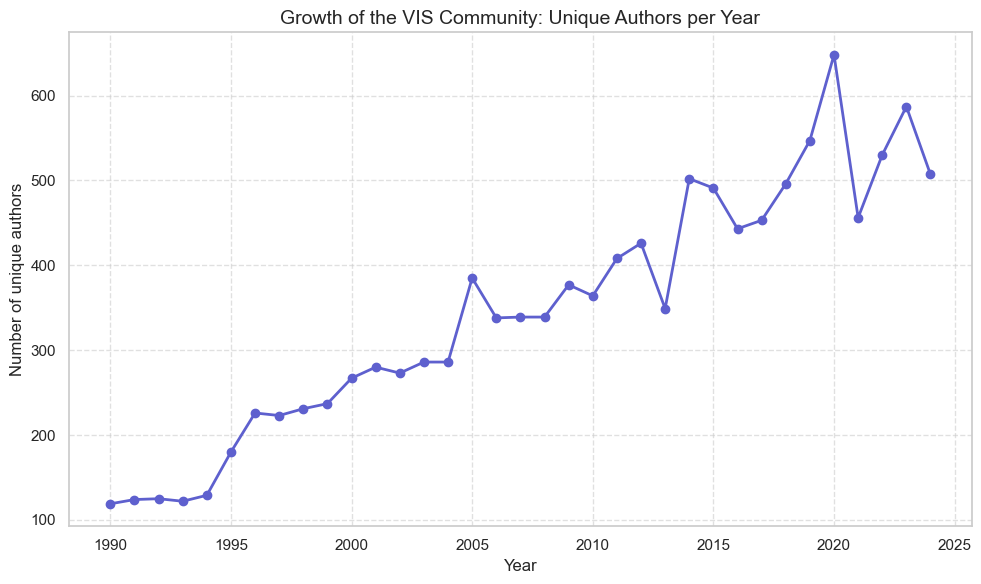

In [15]:
author_col = "Authors" if "Authors" in df_clean.columns else "AuthorNames-Deduped"

def split_authors(author_string):
    if pd.isna(author_string):
        return []
    
    parts = [a.strip() for a in str(author_string).replace(",", ";").split(";")]
    
    return [p for p in parts if len(p) > 1]


df_clean["AuthorList"] = df_clean[author_col].apply(split_authors)


all_authors = [a for sub in df_clean["AuthorList"] for a in sub]

print(f"Totale apparizioni autori: {len(all_authors)}")
print(f"Autori unici totali: {len(set(all_authors))}")


author_counts = Counter(all_authors)

top_authors = pd.DataFrame.from_dict(author_counts, orient='index').reset_index()
top_authors.columns = ["Author", "PaperCount"]
top_authors = top_authors.sort_values("PaperCount", ascending=False).reset_index(drop=True)

print("\n--- Top 10 Authors by Paper Count ---")
print(top_authors.head)


print("\n--- Distribution Stats ---")
print(top_authors["PaperCount"].describe())


authors_per_year = df_clean.explode("AuthorList").groupby("Year")["AuthorList"].nunique()

print("\n--- Unique Authors per Year (Head) ---")
print(authors_per_year.head())


plt.figure(figsize=(10, 6))
authors_per_year.plot(kind='line', marker='o', color='#5E60CE', linewidth=2)

plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of unique authors", fontsize=12)
plt.title("Growth of the VIS Community: Unique Authors per Year", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

Totale keywords trovate: 13351
Keywords uniche: 6593

--- Top 10 Keywords ---
                     Keyword  Count
0           visual analytics    275
1              visualization    233
2  information visualization    205
3           volume rendering    155
4         flow visualization     91
5                interaction     71
6   scientific visualization     68
7       volume visualization     61
8                 evaluation     60
9  uncertainty visualization     53


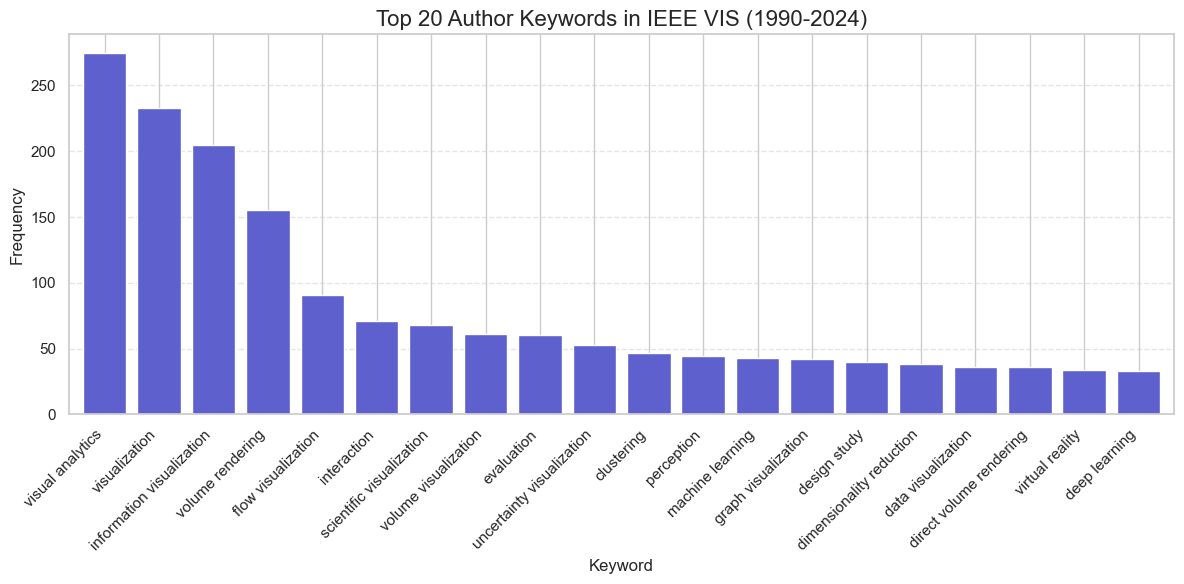

In [22]:
kw_col = "AuthorKeywords" 
if "Keywords" in df_clean.columns: 
    kw_col = "Keywords"


if kw_col not in df_clean.columns:
    print(f"ATTENZIONE: La colonna '{kw_col}' non esiste in df_clean!")
    print("Assicurati di averla inclusa nello script di pulizia (clean_data.py).")
else:

    def split_keywords(kw_string):
        if pd.isna(kw_string):
            return []
        
        parts = [k.strip().lower() for k in str(kw_string).replace(",", ";").split(";")]

        return [p for p in parts if len(p) > 1]


    df_clean["KeywordList"] = df_clean[kw_col].apply(split_keywords)

  
    all_keywords = [k for sub in df_clean["KeywordList"] for k in sub]
    
    print(f"Totale keywords trovate: {len(all_keywords)}")
    print(f"Keywords uniche: {len(set(all_keywords))}")


    keyword_counts = Counter(all_keywords)
    top_keywords = pd.DataFrame(keyword_counts.most_common(50), columns=["Keyword", "Count"])
    
    print("\n--- Top 10 Keywords ---")
    print(top_keywords.head(10))


    top20 = top_keywords.head(20).set_index("Keyword")
    
    plt.figure(figsize=(12, 6))
    

    top20["Count"].plot(kind="bar", color="#5E60CE", width=0.8)
    
    plt.xlabel("Keyword", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.title("Top 20 Author Keywords in IEEE VIS (1990-2024)", fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()

# to be done :

Analisi Affiliazioni in corso...

--- RISULTATI ---
Totale Affiliazioni citate (somma di tutto): 15180
Affiliazioni UNICHE (nomi diversi trovati): 4893

--- TOP 20 Affiliazioni (Prima della pulizia) ---
Affiliation
University of Konstanz, Germany                                                                    156
Hong Kong University of Science and Technology                                                     118
State Key Lab of CAD&CG, Zhejiang University, China                                                 97
Pacific Northwest National Laboratory, USA                                                          71
Northwestern University, USA                                                                        64
Scientific Computing and Imaging Institute, University of Utah, USA                                 63
Microsoft Research                                                                                  61
University of California, Davis, USA                            

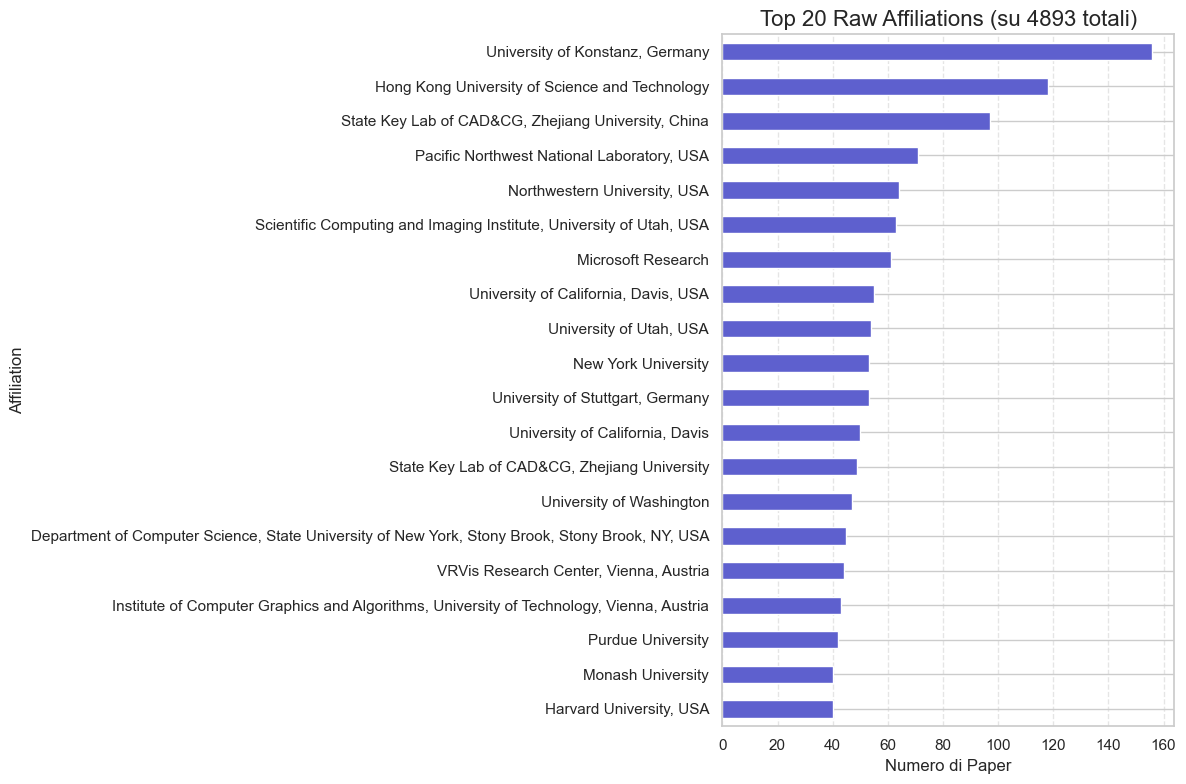

In [24]:

# Selezioniamo la colonna corretta
col_aff = 'AuthorAffiliation' if 'AuthorAffiliation' in df_clean.columns else 'Affiliation'

print("Analisi Affiliazioni in corso...")

# 2. PROCESSO DI ESTRAZIONE
# - Prendiamo la colonna
# - Rimuoviamo i vuoti (NaN)
# - Dividiamo le stringhe per ";"
# - Rimuoviamo gli spazi vuoti extra prima e dopo il nome
all_affiliations = (
    df_clean[col_aff]
    .dropna()
    .astype(str)
    .str.split(';')
    .explode() # Trasforma le liste in righe singole
    .str.strip() # Pulisce spazi bianchi " MIT " -> "MIT"
)

# Rimuoviamo eventuali stringhe vuote rimaste dopo lo split
all_affiliations = all_affiliations[all_affiliations != '']

# 3. STATISTICHE
total_mentions = len(all_affiliations)
unique_count = all_affiliations.nunique()

print(f"\n--- RISULTATI ---")
print(f"Totale Affiliazioni citate (somma di tutto): {total_mentions}")
print(f"Affiliazioni UNICHE (nomi diversi trovati): {unique_count}")

# 4. TOP 20 AFFILIAZIONI (Raw Data)
top_20 = all_affiliations.value_counts().head(20)

print("\n--- TOP 20 Affiliazioni (Prima della pulizia) ---")
print(top_20)

# 5. VISUALIZZAZIONE
plt.figure(figsize=(12, 8))
top_20.sort_values().plot(kind='barh', color='#5E60CE')
plt.title(f"Top 20 Raw Affiliations (su {unique_count} totali)", fontsize=16)
plt.xlabel("Numero di Paper", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [25]:

unique_sorted = all_affiliations.drop_duplicates().sort_values()

print(f"Hai trovato {len(unique_sorted)} affiliazioni uniche.")

# -------------------------------------------------------
# OPZIONE A: SALVA IN UN FILE (Consigliato)
# -------------------------------------------------------
# Questo crea un file nella tua cartella che puoi aprire con Excel/Notepad
filename = "lista_affiliazioni_completa.csv"
unique_sorted.to_csv(filename, index=False, header=["AffiliationName"])

print(f"✅ Lista completa salvata nel file: '{filename}'")
print("Apri questo file per analizzarli comodamente.")

# -------------------------------------------------------
# OPZIONE B: STAMPA TUTTO A VIDEO (Attenzione!)
# -------------------------------------------------------
# Se vuoi proprio vederli qui sotto, usiamo un loop.
# Nota: Se sono più di 5000, potrebbe rallentare.

print("\n--- INIZIO LISTA ALFABETICA COMPLETA ---")

# Impostiamo Pandas per mostrare tutte le righe senza nasconderle
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Se vuoi vederli come lista pulita:
for aff in unique_sorted:
    print(aff)

print("--- FINE LISTA ---")

# Resetta le opzioni per non intasare le future stampe
pd.reset_option('display.max_rows')


Hai trovato 4893 affiliazioni uniche.
✅ Lista completa salvata nel file: 'lista_affiliazioni_completa.csv'
Apri questo file per analizzarli comodamente.

--- INIZIO LISTA ALFABETICA COMPLETA ---
100 Hamilton Ave Suite 300 Palo Alto CA 94301, USA
11 Wild Plum Court, Stafford, CA, USA
3iap, China
3iap, USA
A Mitsubishi Electric Research Lab, MERL
AG Graphische Datenverarbeitung and Computergeometrie, Fachbereich Informatik, Universität Kaiserslautern, Germany
AG Graphische Datenverarbeitung und Computergeometrie, FB Informatik, University of Kaiserslautern, Germany
AG Graphische Datenverarbeitung und Computergeometrie, FB Informatik, University of Kaiserslautern, Germany and Center for Image Processing and Integrated Computing, Department of Computer Science, University of California, Davis, USA
AGFA, Wilmington, MA, USA
AGFA-Gevaert N. V., Canada
ALICE Group, INRIA, Lorraine, Nancy, France
AMTI, NASA Ames Research Center, USA
ART COM e.V., Berlin, Germany
AT and T Bell Laboratories, Inc